# Stress Level Dataset

# Introduction

Stress has become an unavoidable part of modern life, impacting mental health, productivity, and overall well-being. Identifying stress patterns and predicting stress levels can help individuals and organizations take preventive actions before stress reaches harmful levels.
In this project, machine learning regression techniques are applied to predict an individual’s stress level based on physiological and behavioral attributes. By analyzing various contributing factors, this model aims to provide an intelligent approach to understanding and forecasting stress intensity.

# Problem Statement

The main objective of this project is to develop a machine learning model that accurately predicts a person’s stress level based on multiple input features such as lifestyle habits, physical indicators, and environmental factors.

# Import Required Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Dataset

In [88]:
df = pd.read_csv(r"E:\Data_Science\Project\ML_project4\StressLevelDataset.csv")

# Inspecting the data

In [89]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [90]:
df.tail()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


In [91]:
print("Dataset shape:", df.shape)

Dataset shape: (1100, 21)


In the result displayed, you can see the data has 1100 records, each with 21 columns.

The **`info()`** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [92]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load        

In [93]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


# Detect and Remove Outliers

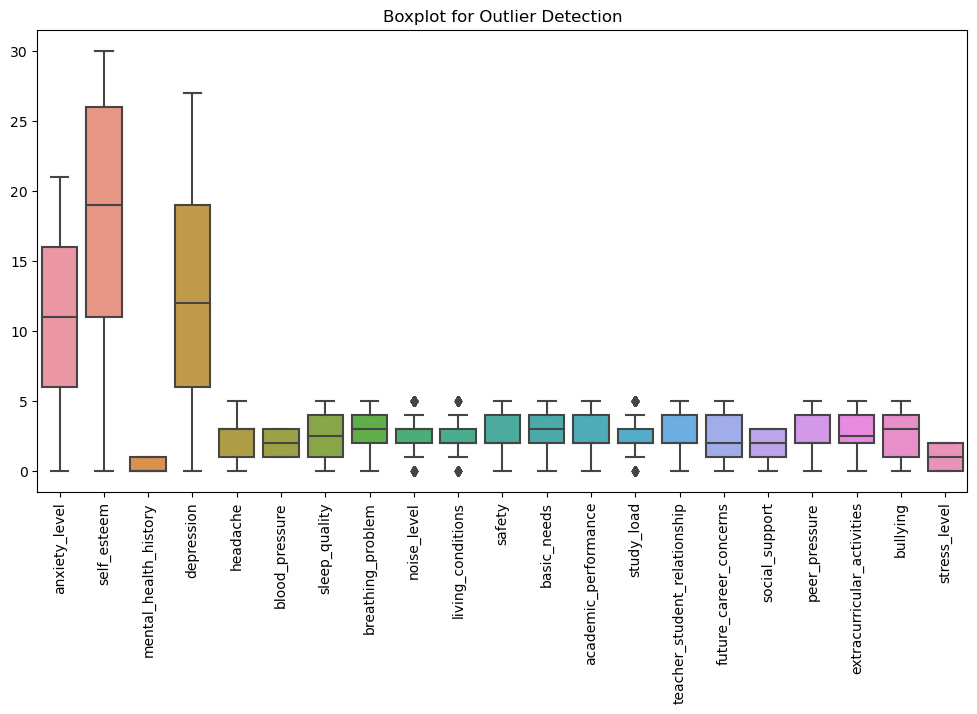

After removing outliers: (645, 21)


In [94]:
# Boxplot for visual detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# IQR method to remove outliers
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df)
print("After removing outliers:", df.shape)


# Correlation Heatmap

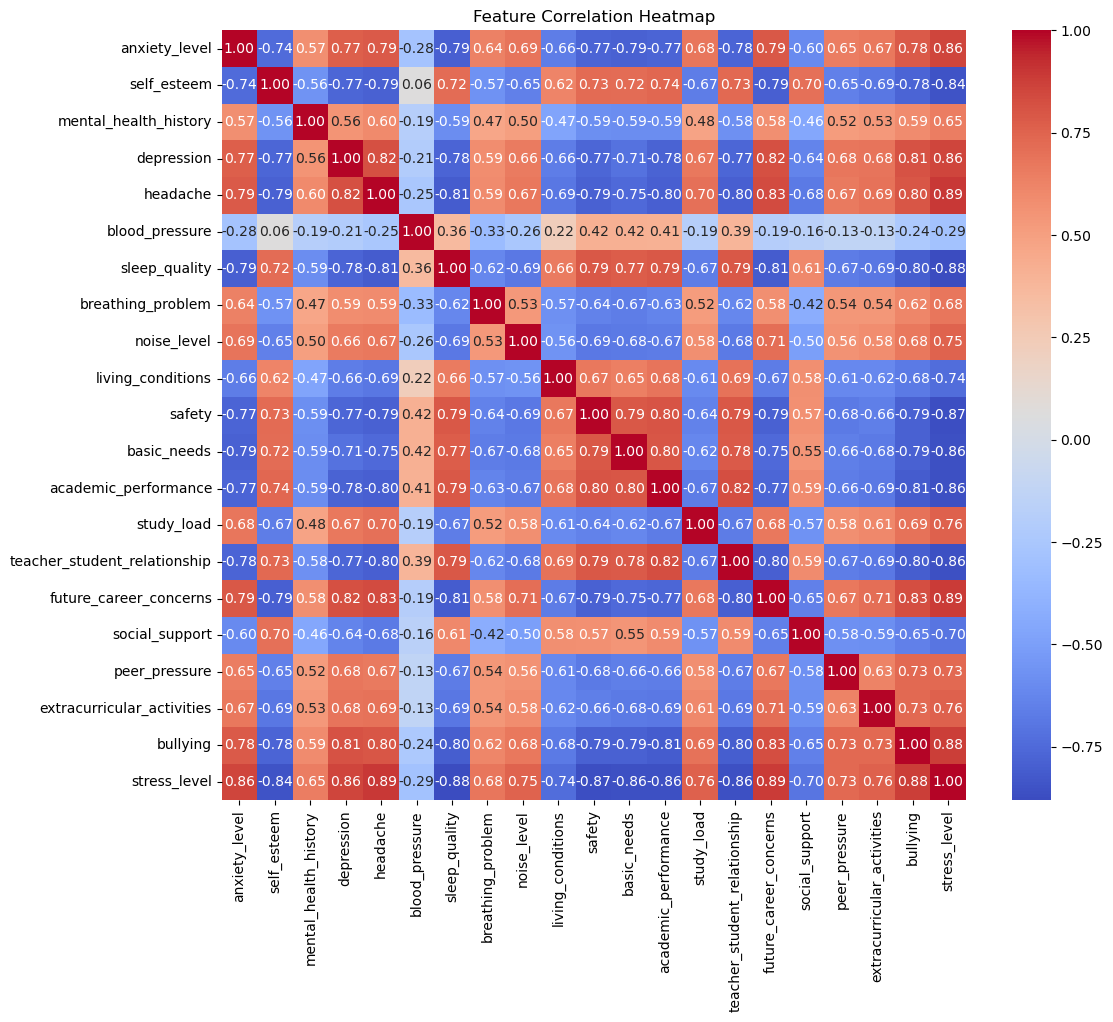

In [95]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Encode Categorical Columns

In [96]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

print("\nAfter encoding categorical features:")
print(df.head())



After encoding categorical features:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
6              4           26                      0           6         1   
7             17            3                      1          22         4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
2               1              2                  2            2   
3               3              1                  3            4   
6               2              4                  1            1   
7               3              1                  5            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0       

# Define Features and Target

In [97]:
target_column = 'stress_level'
X = df.drop(target_column, axis=1)
Y = df[target_column]

# Split into Train and Test Sets

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Feature Scaling

In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor

In [100]:
regressor = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Make Predictions

In [101]:
y_pred = regressor.predict(X_test)

# Evaluate Model

In [102]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("\n--- Model Evaluation ---")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


--- Model Evaluation ---
Mean Absolute Error (MAE): 0.0063178294573643405
Mean Squared Error (MSE): 0.004489341085271318
Root Mean Squared Error (RMSE): 0.06700254536412269
R² Score: 0.9879387915724895


# Visualize Actual vs Predicted

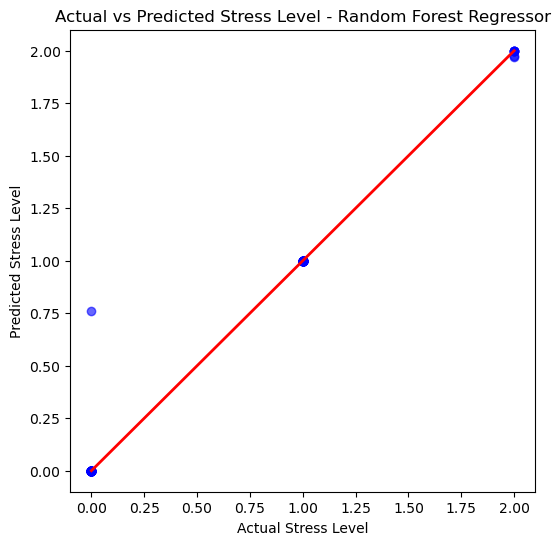

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level - Random Forest Regressor")
plt.show()

# Feature Importance

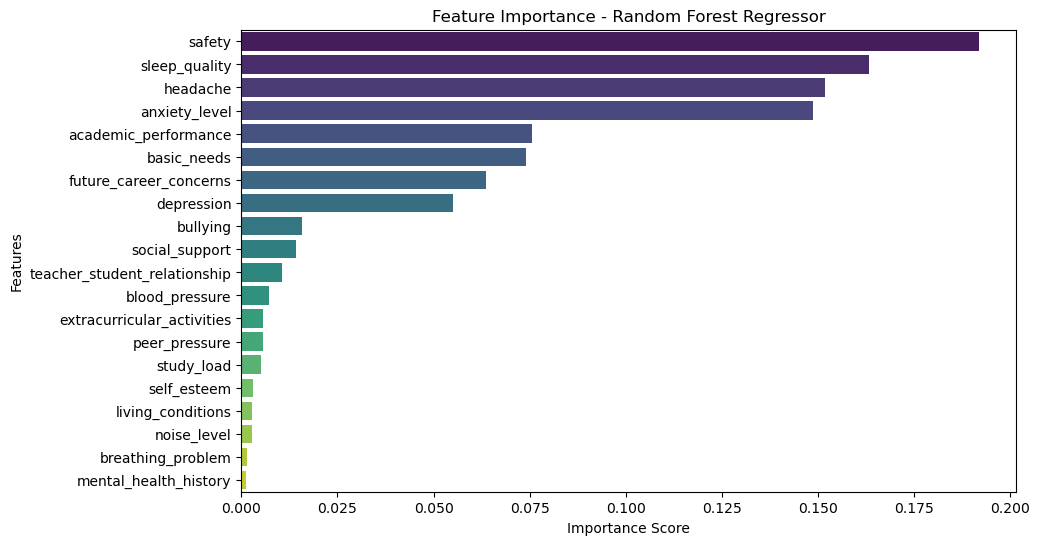

In [104]:
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Results and Inference

After training and testing the Random Forest Regressor, the model’s performance was evaluated using unseen test data.
The evaluation metrics are as follows:

Metric	Value
* Mean Absolute Error (MAE)	       ` 0.0063`
* Mean Squared Error (MSE)	        `0.0045`
* Root Mean Squared Error (RMSE)	`0.0670`
* R² Score	                        `0.9879`

These results indicate that:

The low error values (MAE, MSE, RMSE) confirm that the predicted stress levels are very close to the actual values.

The R² score of 0.9879 demonstrates that the model explains approximately 98.8% of the variance in stress levels.

Overall, the Random Forest model achieved exceptional predictive accuracy and generalization capability.

# Conclusion

The machine learning model effectively predicts stress levels with high accuracy. Proper preprocessing (including outlier handling, encoding, and scaling) significantly improved data quality and model reliability.
The Random Forest Regressor proved to be a robust choice for this regression problem, achieving an R² score of 0.9879 — indicating excellent performance.

This predictive framework can be utilized in:

Health and wellness applications to monitor stress in real-time.

Workplace wellness programs for early stress detection and intervention.

Research studies to explore correlations between lifestyle factors and stress intensity.

Future enhancements could include comparing multiple regression models (e.g., Linear Regression, Gradient Boosting, or Neural Networks) and incorporating real-time biometric data for continuous monitoring.